In [989]:
import numpy as np
from sklearn import datasets
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

IMPLEMENTACJA

In [990]:
# https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
class KNNClassifier:
    def __init__(self, n_neighbors=1, use_KDTree=False):
        self.n_neighbors = n_neighbors
        self.use_KDTree = use_KDTree

    @staticmethod
    def euclidean(X_train, X):
        return np.sqrt(np.sum((X_train - X)**2, axis=1))

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)


    def predict(self, X):
        # self.labels = []
        y = []
        for i, x in enumerate(X):
            distances = KNNClassifier.euclidean(self.X_train, x)
            # self.neighbors.append([distances, i])
            # self.neighbors.sort(reverse=False)
            # self.neighbors = self.neighbors[0:self.n_neighbors]
            # labels = [self.y_train[i] for _, i in self.neighbors]
            # self.labels.append(mode(labels))

            neighbors_idx = np.argsort(distances)[0:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_idx]

            yi = mode(neighbors_labels)
            y.append(yi)

        y = np.array(y)
        return y
        # self.labels = np.array(self.labels)     
        # return self.labels

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy * 100

KLASYFIKACJA

Zadanie 1

In [991]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_repeated=0, random_state=3)

Zadanie 2

In [992]:
knnClassifier = KNNClassifier(n_neighbors=2, use_KDTree=False)
knnClassifier.fit(X, y)

Zadanie 3

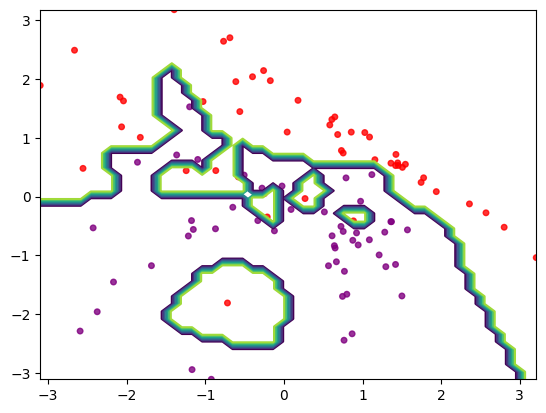

In [993]:
x_ = np.linspace(np.amin(X[:, 0]), np.amax(X[:, 0]))
y_ = np.linspace(np.amin(X[:, 1]), np.amax(X[:, 1]))
xv, yv = np.meshgrid(x_, y_)

Z = knnClassifier.predict(np.vstack((xv.ravel(), yv.ravel())).T)
Z = Z.reshape(xv.shape)
plt.contour(xv, yv, Z)
colormap = np.array(['purple', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], alpha=0.8, s=4**2);


Zadanie 4

In [994]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

knnClassifier.fit(X, y)

Zadanie 5

In [995]:
pca = PCA(n_components=2)
# X_reduced = pca.fit(X).transform(X)
X_reduced = pca.fit_transform(X)

a)

In [996]:
x_ = np.linspace(np.amin(X_reduced [:, 0]), np.amax(X_reduced [:, 0]))
y_ = np.linspace(np.amin(X_reduced [:, 1]), np.amax(X_reduced [:, 1]))
xv, yv = np.meshgrid(x_, y_)

mesh_flat = np.vstack((xv.ravel(), yv.ravel())).T

b)

In [997]:
X_extended = pca.inverse_transform(mesh_flat)

c)

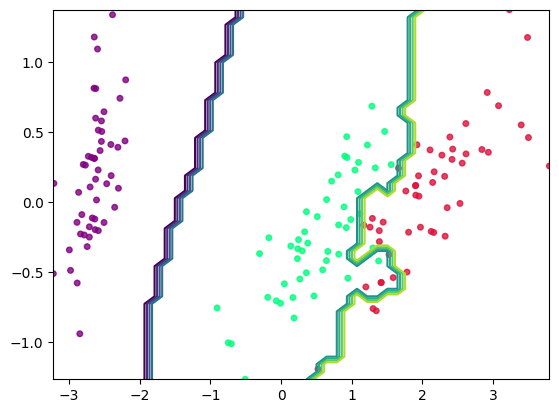

In [998]:
Z = knnClassifier.predict(X_extended)
Z = Z.reshape(xv.shape)

plt.contour(xv, yv, Z)
colormap = np.array(['rebeccapurple', 'springgreen', 'crimson'])
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colormap[y], alpha=0.8, s=4**2);